In [1]:
import os
from io import StringIO

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from darts import TimeSeries

In [11]:
def aggregate_metrics(df):
    """
    Função para calcular a média de MAE, RMSE e MSE, agrupando por Model, target e Activity.

    Parâmetros:
    df (pd.DataFrame): DataFrame contendo os dados com as colunas 'Model', 'target', 'Activity', 'MAE', 'RMSE', 'MSE'.

    Retorna:
    pd.DataFrame: DataFrame agregado contendo as médias das métricas MAE, RMSE e MSE por Model, target e Activity.
    """
    
    # Verificar se as colunas necessárias estão presentes no DataFrame
    required_columns = ['Model', 'target', 'Activity', 'MAE', 'RMSE', 'MSE']
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Coluna {col} está ausente no DataFrame")

    # Agrupar por Model, target e Activity e calcular as médias das métricas
    aggregated_df = df.groupby(['Model', 'target', 'Activity'], as_index=False).agg({
        'MAE': 'mean',
        'RMSE': 'mean',
        'MSE': 'mean'
    })
    
    # Renomear as colunas agregadas para refletir que são médias
    aggregated_df.rename(columns={
        'MAE': 'MAE_Mean',
        'RMSE': 'RMSE_Mean',
        'MSE': 'MSE_Mean'
    }, inplace=True)
    
    return aggregated_df

In [15]:
def plot_bar_for_means_by_target(df):
    """
    Gera bar plots para as métricas MAE_Mean, RMSE_Mean e MSE_Mean, separadas por cada target único no DataFrame.

    Parâmetros:
    df (pd.DataFrame): O DataFrame que contém os dados para os bar plots.

    Retorna:
    None: Exibe os bar plots de MAE_Mean, RMSE_Mean e MSE_Mean para cada target único.
    """
    # Obtendo os targets únicos
    targets = df['target'].unique()
    
    # Lista de métricas que serão plotadas
    metrics = ['MAE_Mean', 'RMSE_Mean', 'MSE_Mean']
    
    # Iterar sobre cada target único
    for target in targets:
        # Filtrando os dados para o target específico
        target_data = df[df['target'] == target]
        
        # Iterar sobre cada métrica
        for metric in metrics:
            # Plotando o barplot para o target e métrica específicos
            plt.figure(figsize=(10, 6))
            sns.barplot(data=target_data, x='Activity', y=metric, hue='Model')
            
            # Ajustando título e rótulos dos eixos
            plt.title(f'Bar Plot of {metric} for target: {target}')
            plt.ylabel(metric)
            plt.xlabel('Model')
            
            # Exibindo o gráfico
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

In [19]:
def plot_metrics_by_target(df):
    """
    Função para gerar boxplots de MAE, RMSE e MSE agrupados por 'Model', 'target' e 'Activity'.

    Parâmetros:
    df (pd.DataFrame): DataFrame contendo os dados com as colunas 'Model', 'target', 'Activity', 'MAE', 'RMSE', 'MSE'.

    Retorna:
    None: Exibe os gráficos de boxplots.
    """
    
    # # Remover o modelo 'LinearRegression'
    # data = df[df['Model'] != 'LinearRegression'].reset_index(drop=True)

    # Remover valores NaN e infinitos
    # data.replace([np.inf, -np.inf], np.nan, inplace=True)
    # data.dropna(inplace=True)

    # Obter lista de targets únicos
    targets = data['target'].unique()

    # Loop pelos targets (e.g. CQI, RSRP, RSRQ, RSSI, SNR)
    for target in targets:
        # Filtrar os dados para o target atual
        data_subset = data[data['target'] == target]

        # Criar subplots para MAE, RMSE e MSE
        fig, axes = plt.subplots(3, 1, figsize=(15, 20))
        fig.suptitle(f'Boxplots for {target}', fontsize=16)

        # Plot MAE metrics
        sns.boxplot(data=data_subset, x='Activity', y='MAE', hue='Model', ax=axes[0])
        axes[0].set_title(f'Boxplot of MAE for {target}')
        axes[0].set_ylabel('MAE')
        axes[0].legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

        # Plot RMSE metrics
        sns.boxplot(data=data_subset, x='Activity', y='RMSE', hue='Model', ax=axes[1])
        axes[1].set_title(f'Boxplot of RMSE for {target}')
        axes[1].set_ylabel('RMSE')
        axes[1].legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

        # Plot MSE metrics
        sns.boxplot(data=data_subset, x='Activity', y='MSE', hue='Model', ax=axes[2])
        axes[2].set_title(f'Boxplot of MSE for {target}')
        axes[2].set_ylabel('MSE')
        axes[2].legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

        # Ajuste de layout para os títulos e legendas
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

## Lendo o arquivo em parquet

In [2]:
df = pd.read_parquet(
    os.path.join(os.pardir, "download-data", "metrics_univariate.parquet")
)

In [3]:
data = df.reset_index()

In [6]:
data.columns

Index(['level_0', 'index', 'Time_Index', 'Model', 'Actuals', 'Preds',
       'ElapsedTime', 'target', 'Activity', 'MAE', 'RMSE', 'MSE'],
      dtype='object')

In [9]:
data[["Model", "target", "Activity","MAE", "RMSE", "MSE", "ElapsedTime"]]

,Model,target,Activity,MAE,RMSE,MSE,ElapsedTime
0,Naive,RSRP,static_strm,0.888024,9.435219,89.023353,0.788713
1,Naive,RSRQ,static_strm,0.015569,0.196527,0.038623,0.772936
2,Naive,SNR,static_strm,0.077545,0.957557,0.916916,0.768017
3,Naive,CQI,static_strm,0.012874,0.186763,0.034880,0.767173
4,Naive,RSRP,static_strm,1.122754,1.508922,2.276846,2.310704
...,...,...,...,...,...,...,...
807,NaiveDrift,RSRP,driving_down,3.398373,5.761753,33.197799,0.398843
808,NaiveDrift,RSRQ,driving_down,0.337485,0.902121,0.813823,0.403522
809,NaiveDrift,SNR,driving_down,0.529112,1.568850,2.461289,0.399213
810,NaiveDrift,CQI,driving_down,0.267708,0.788636,0.621947,0.402204


## Bar plots das médias.

In [21]:
agg_data = aggregate_metrics(data)
agg_data

,Model,target,Activity,MAE_Mean,RMSE_Mean,MSE_Mean
0,Naive,CQI,driving_down,1.533804,2.449123,6.606067
1,Naive,CQI,driving_strm,1.530816,2.484209,6.389908
2,Naive,CQI,static_down,1.614000,2.291725,5.481768
3,Naive,CQI,static_strm,0.954002,1.653173,3.538913
4,Naive,RSRP,driving_down,3.165770,4.971540,25.890632
5,Naive,RSRP,driving_strm,3.285038,5.168258,27.759269
6,Naive,RSRP,static_down,0.621168,0.969422,0.949529
7,Naive,RSRP,static_strm,0.753398,1.789902,7.974207
8,Naive,RSRQ,driving_down,1.262651,1.991987,4.594918
9,Naive,RSRQ,driving_strm,1.580712,2.503996,6.493559


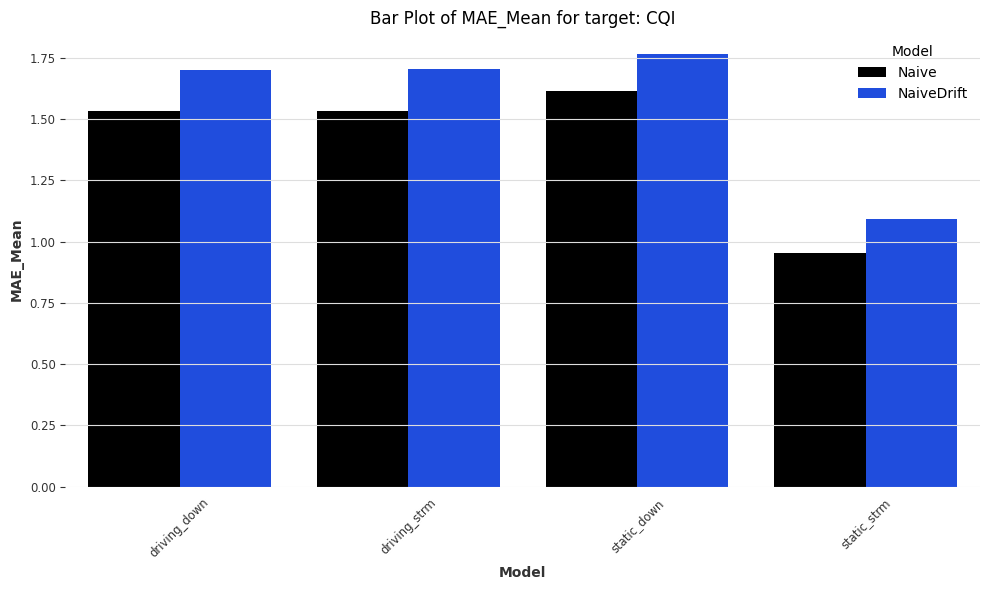

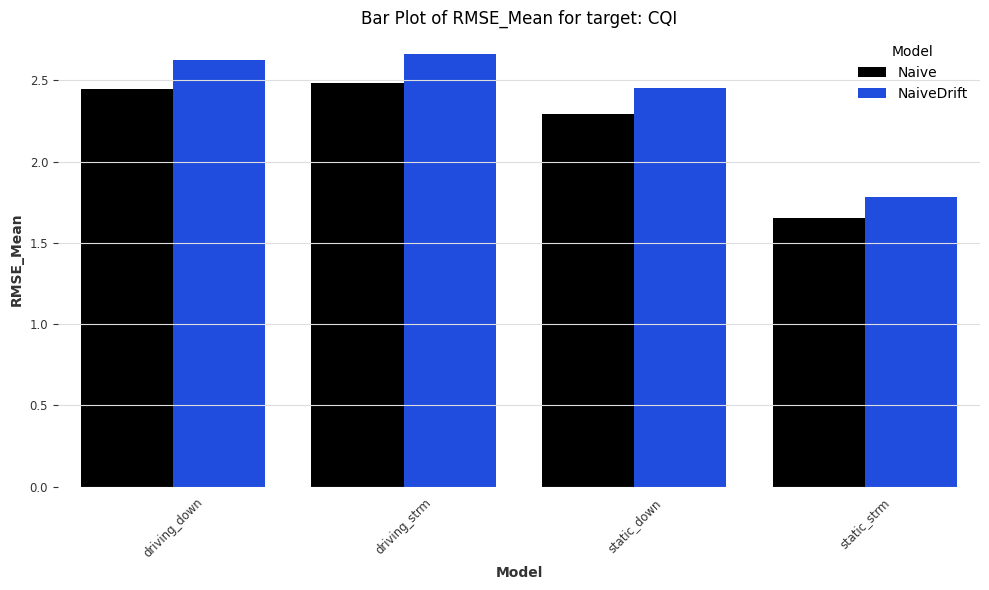

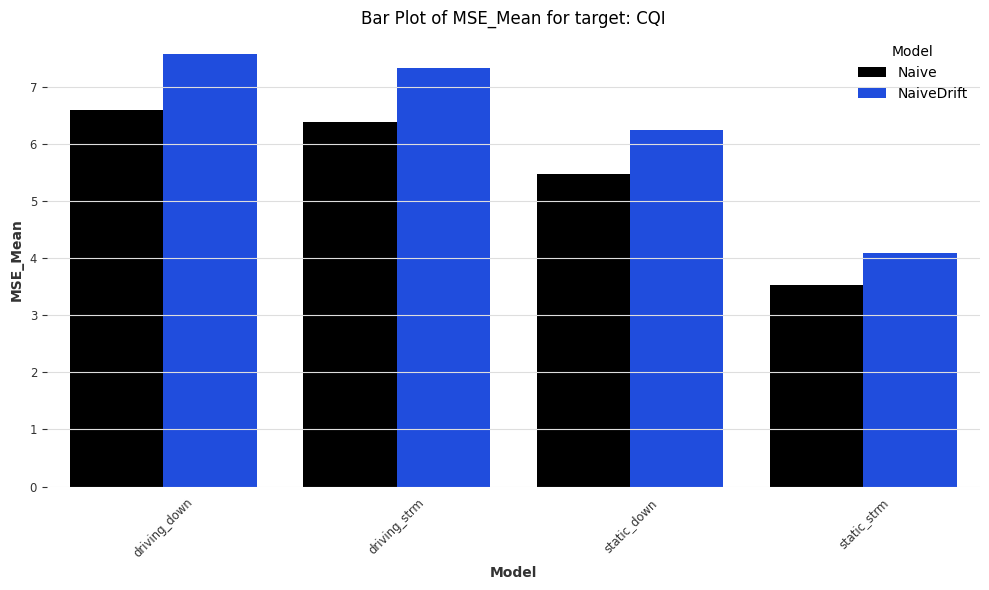

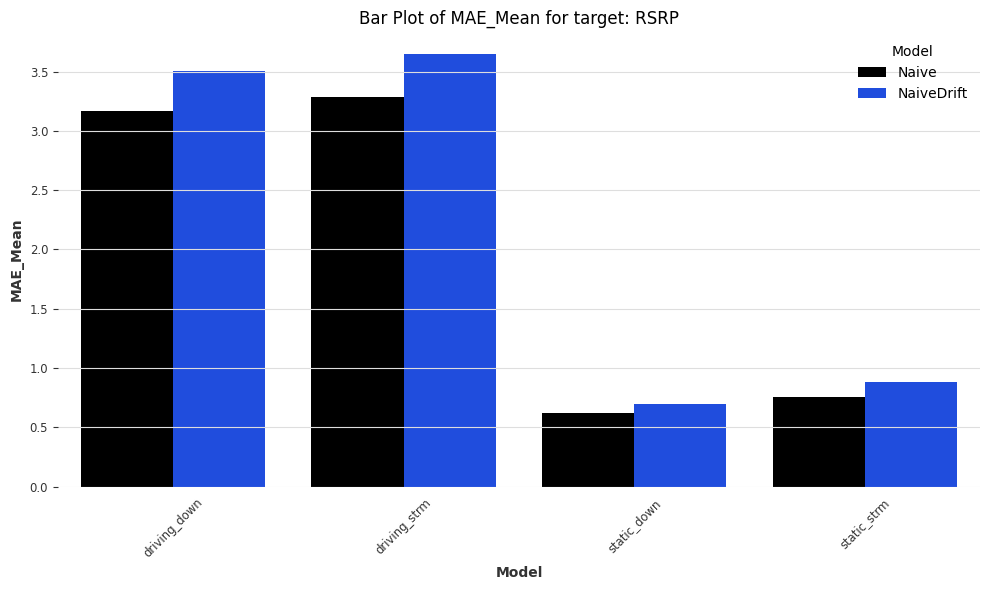

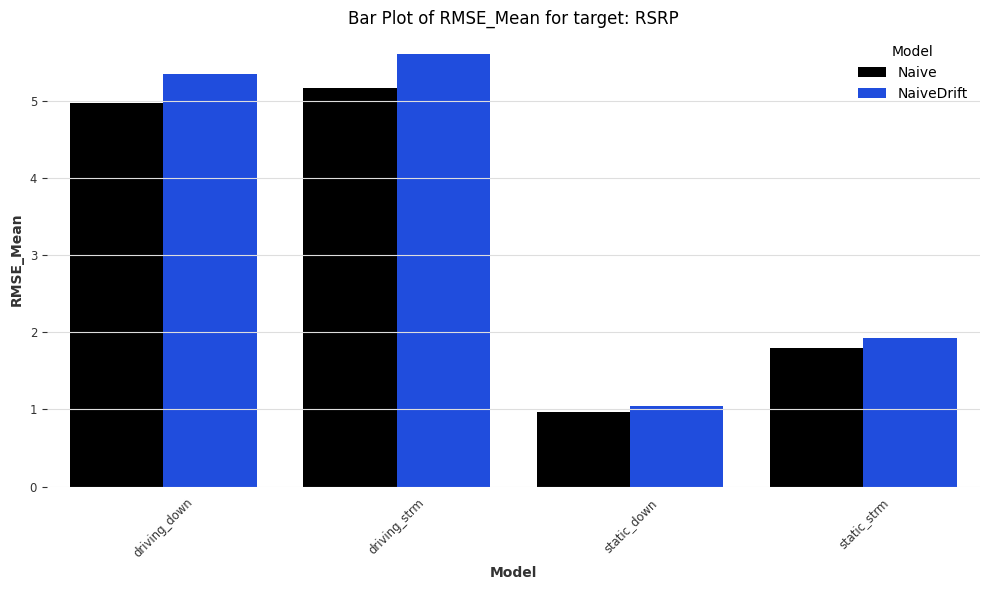

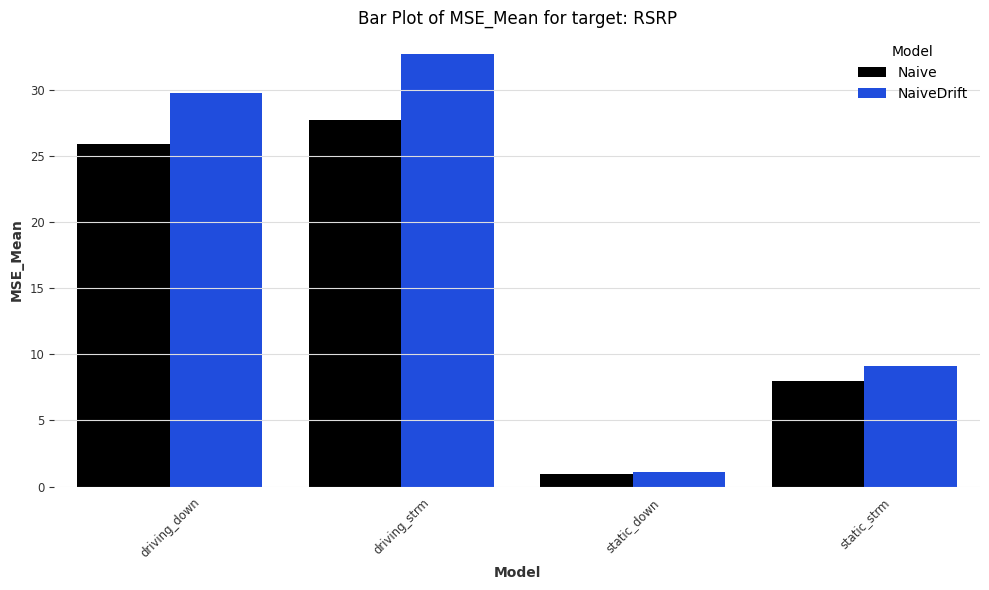

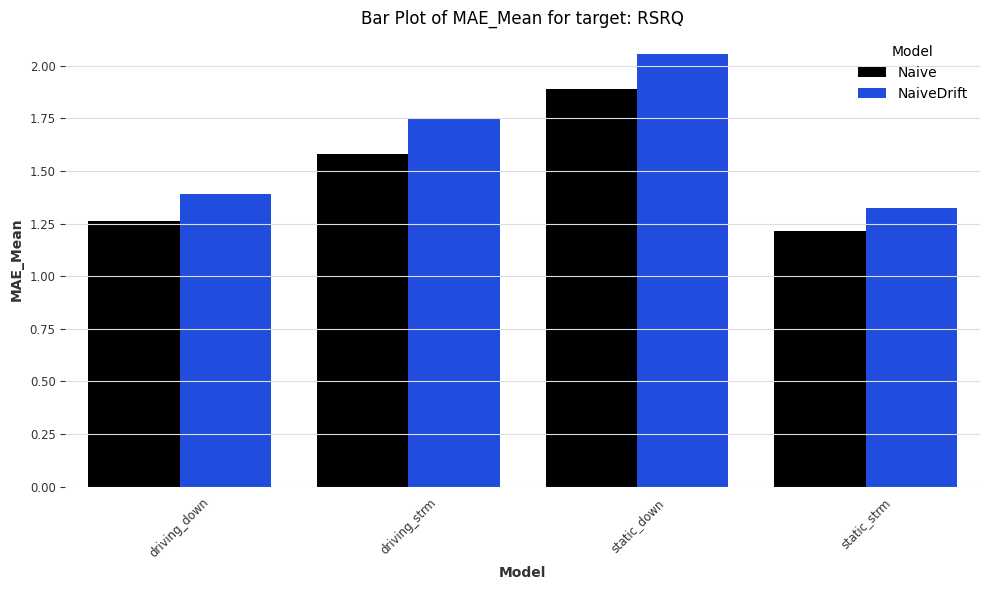

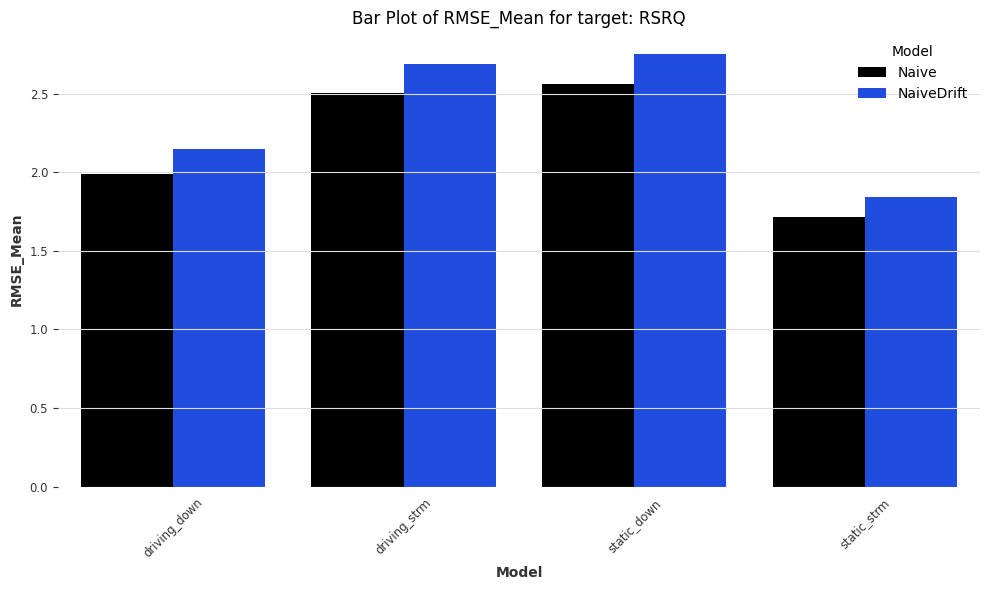

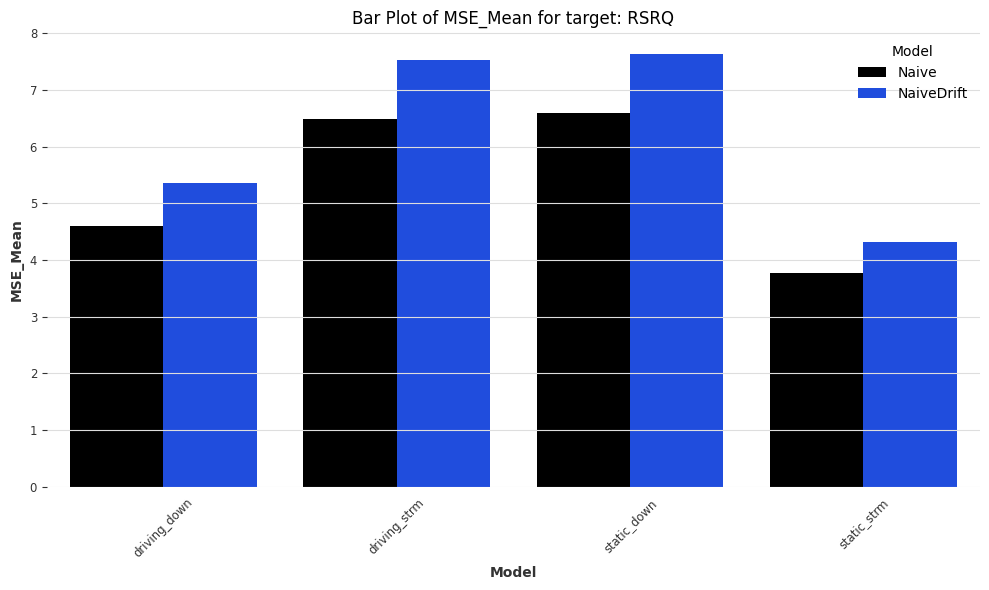

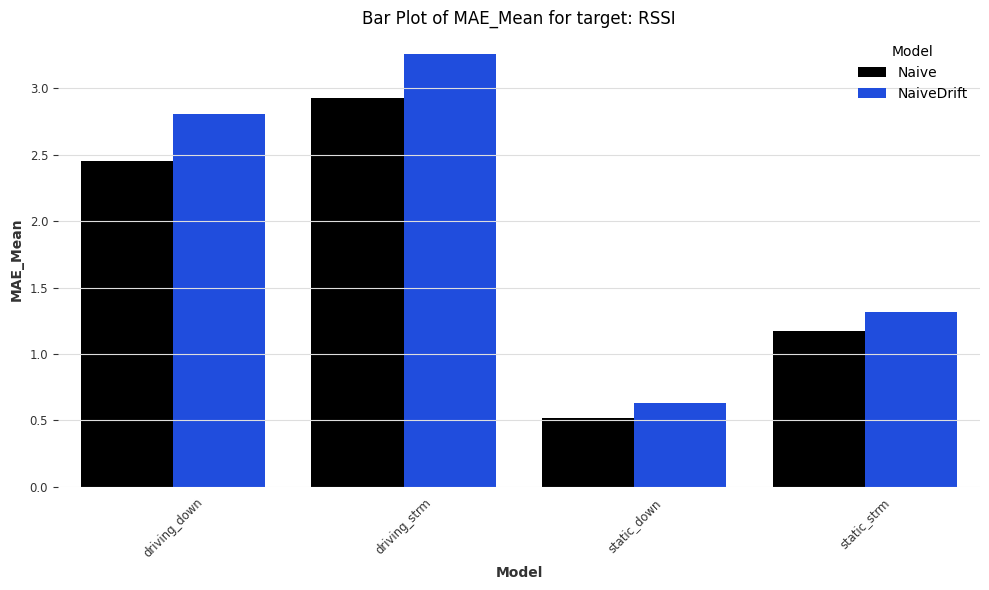

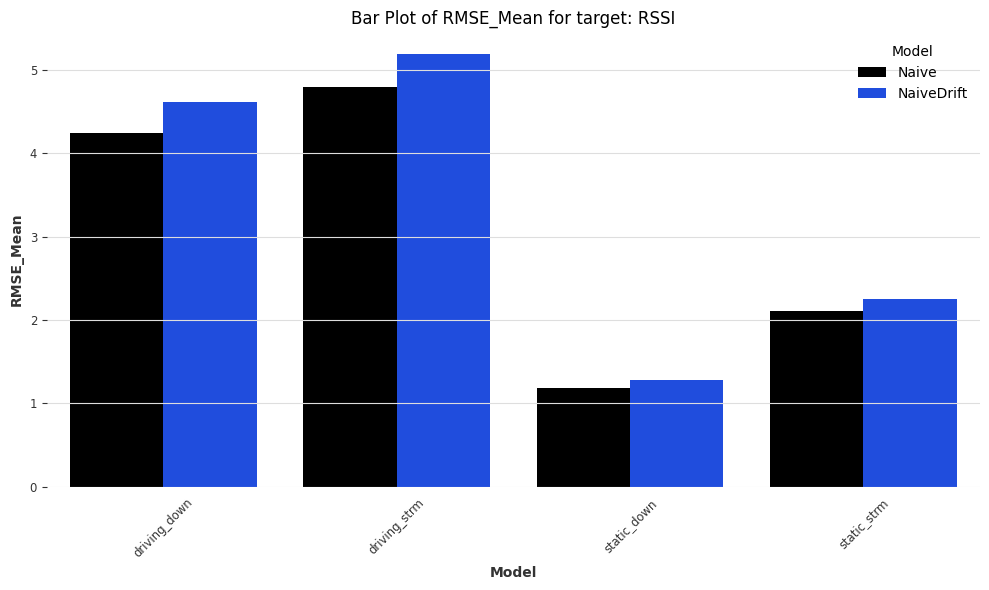

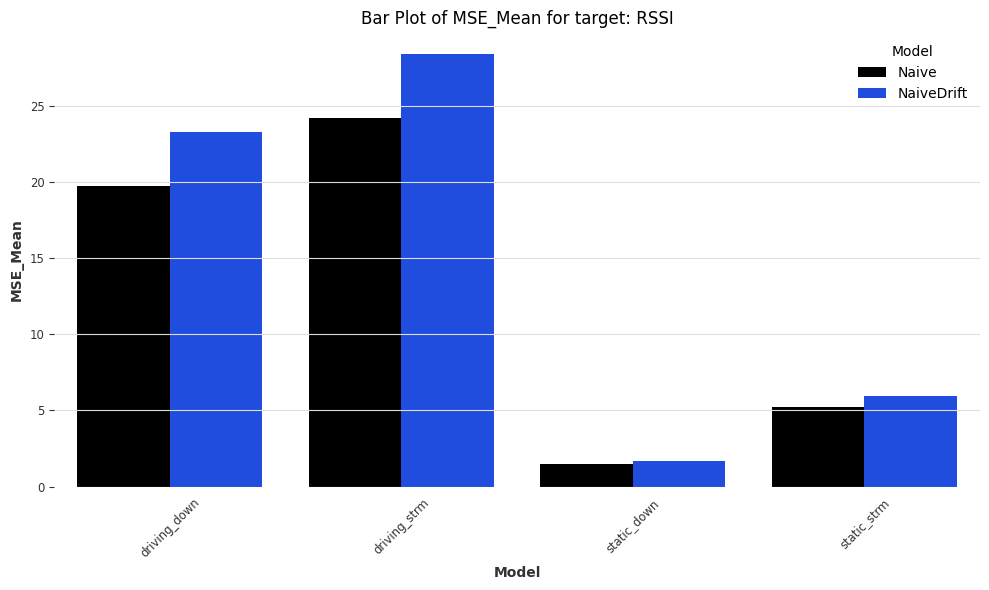

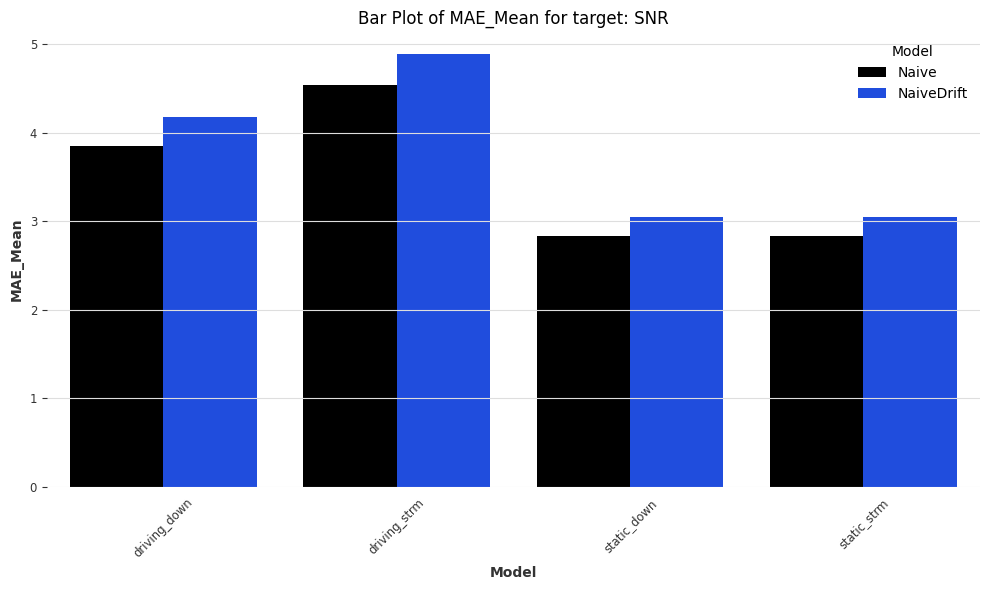

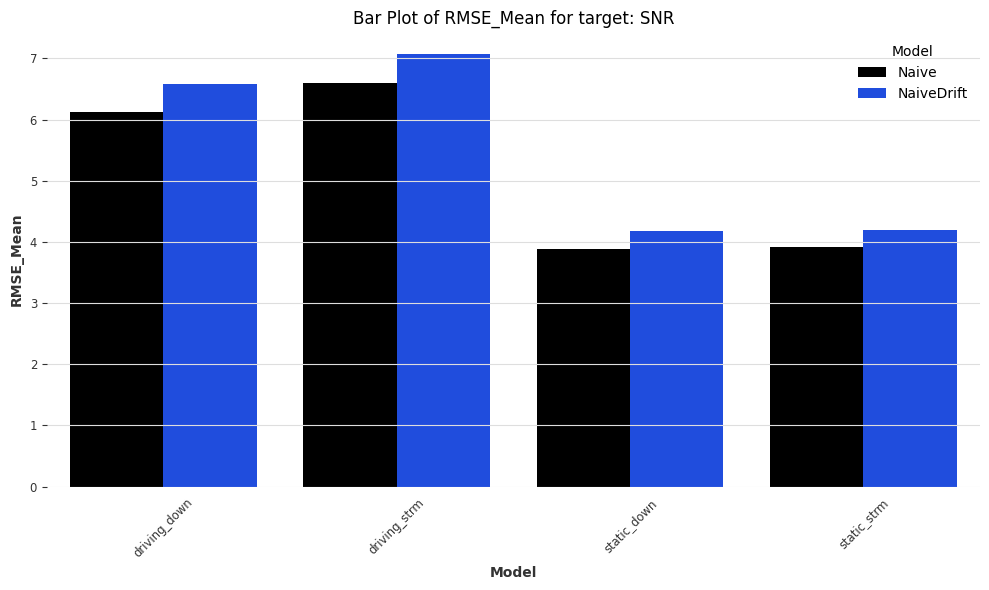

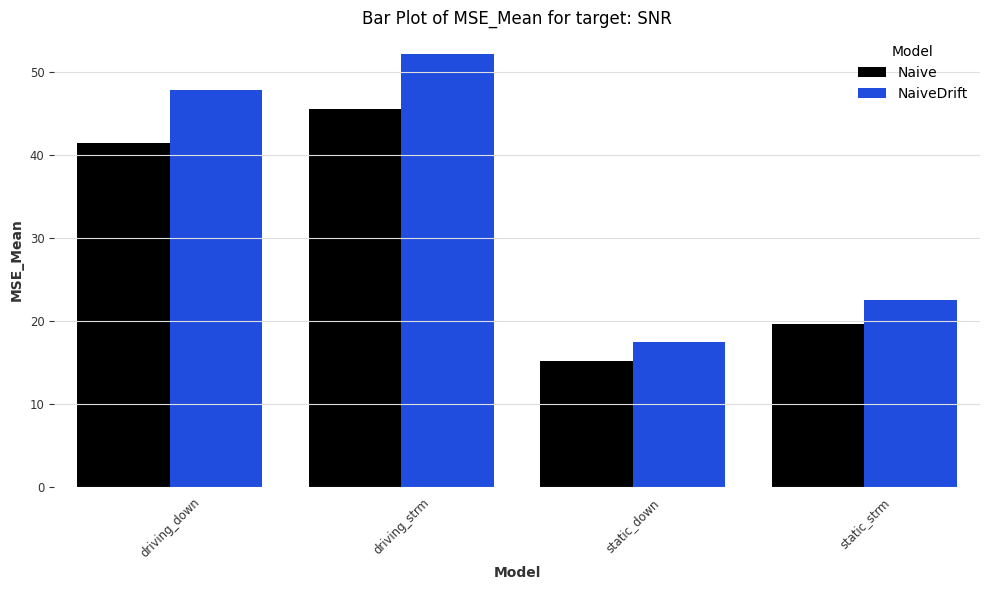

In [22]:

plot_bar_for_means_by_target(agg_data)

## Boxplot das métricas

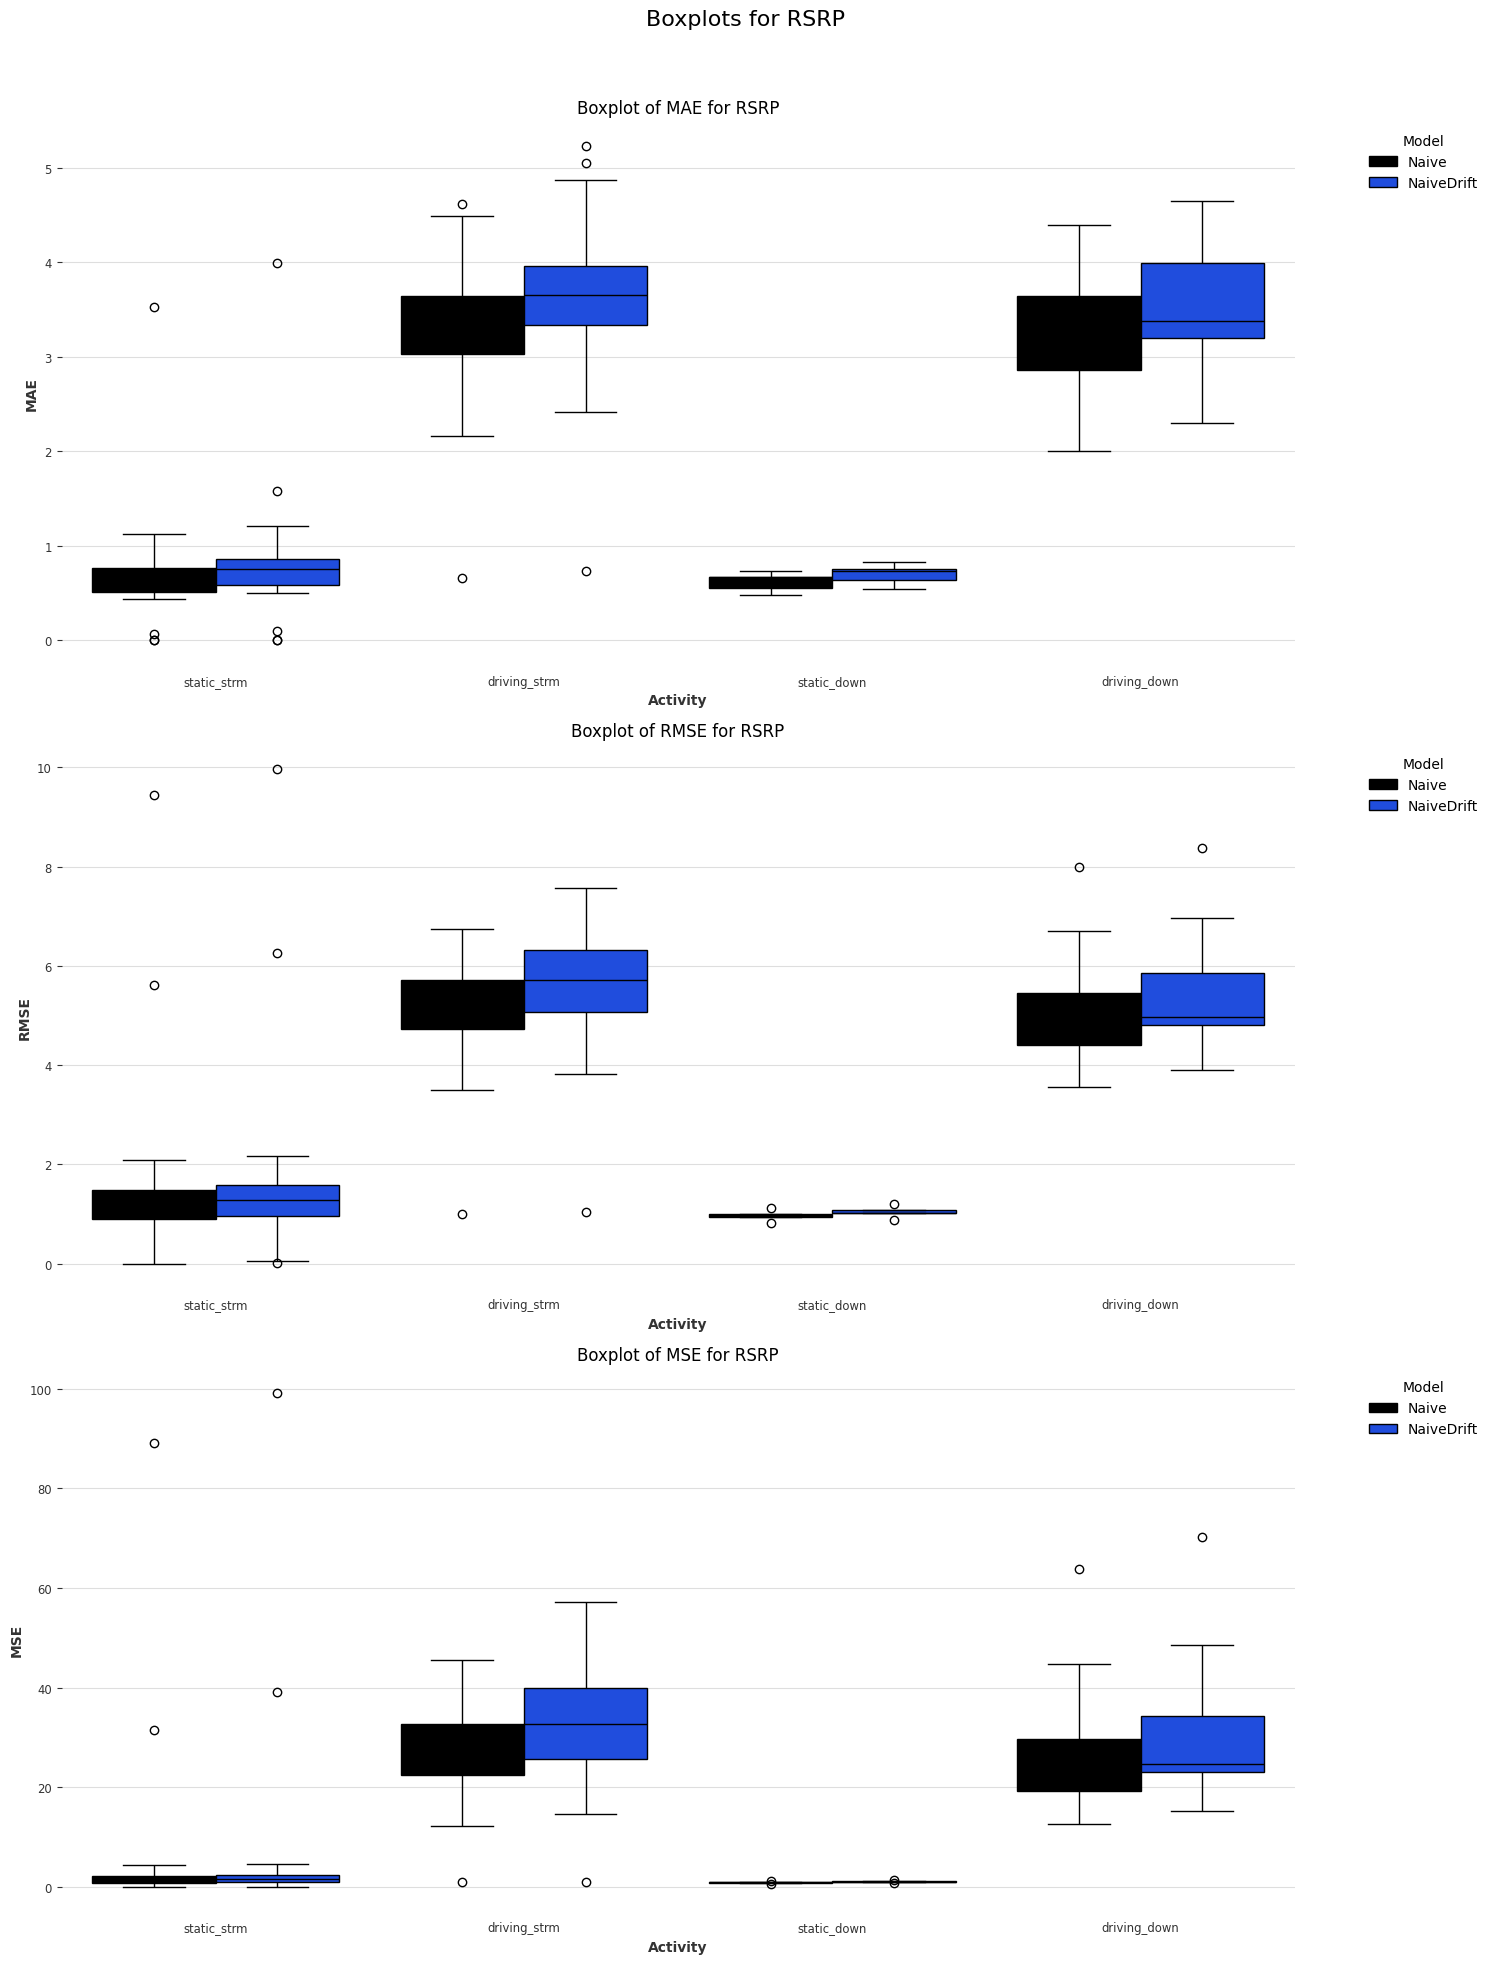

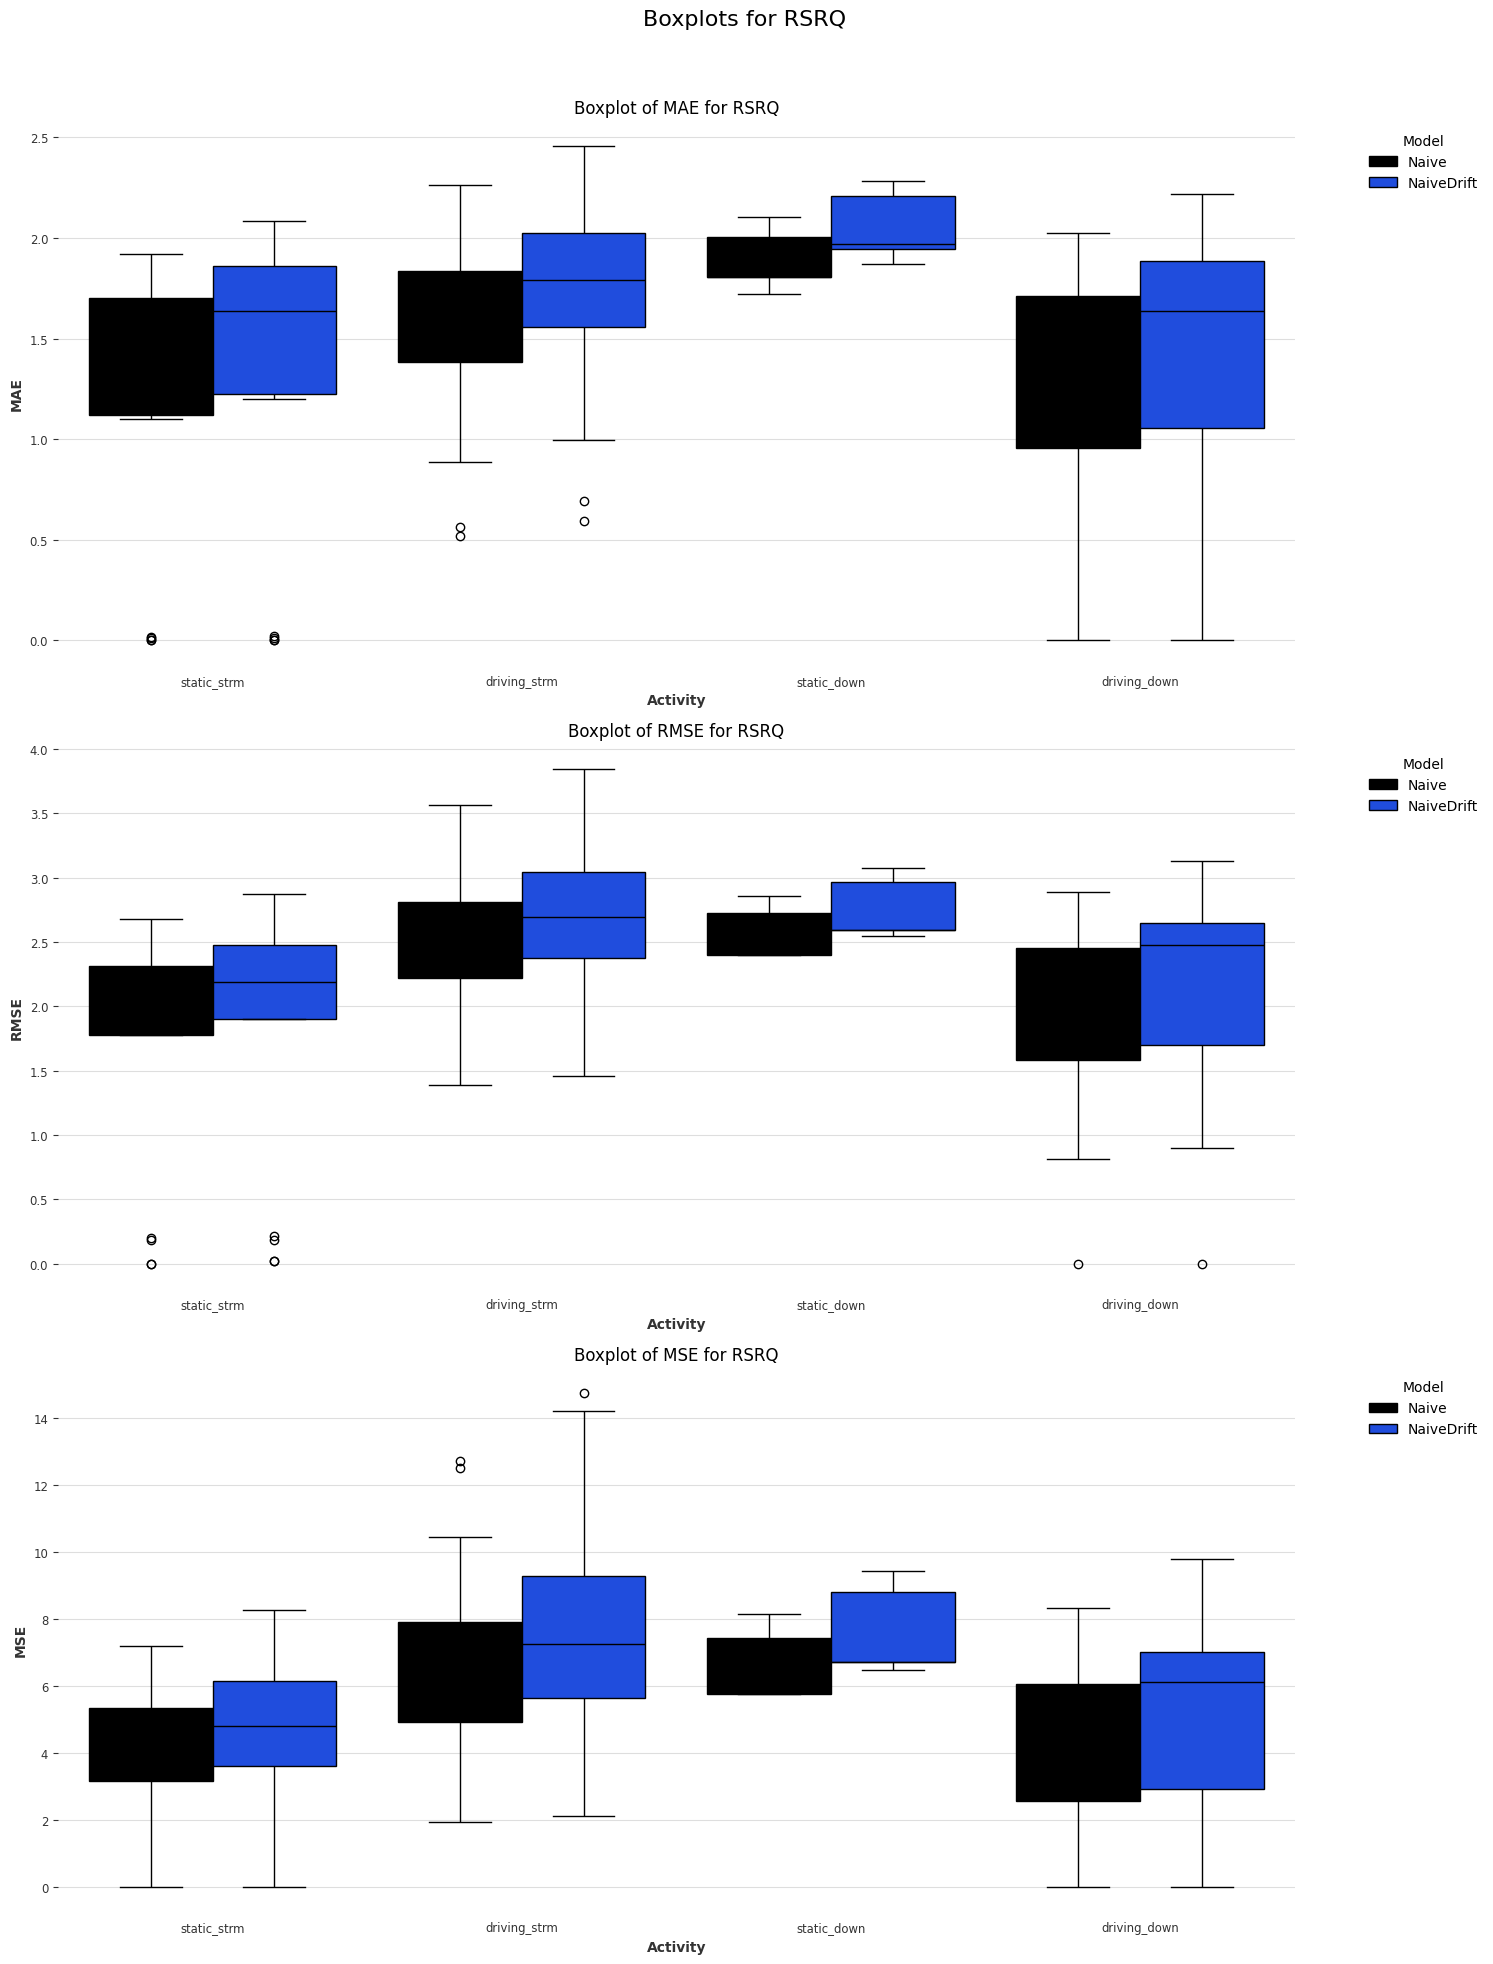

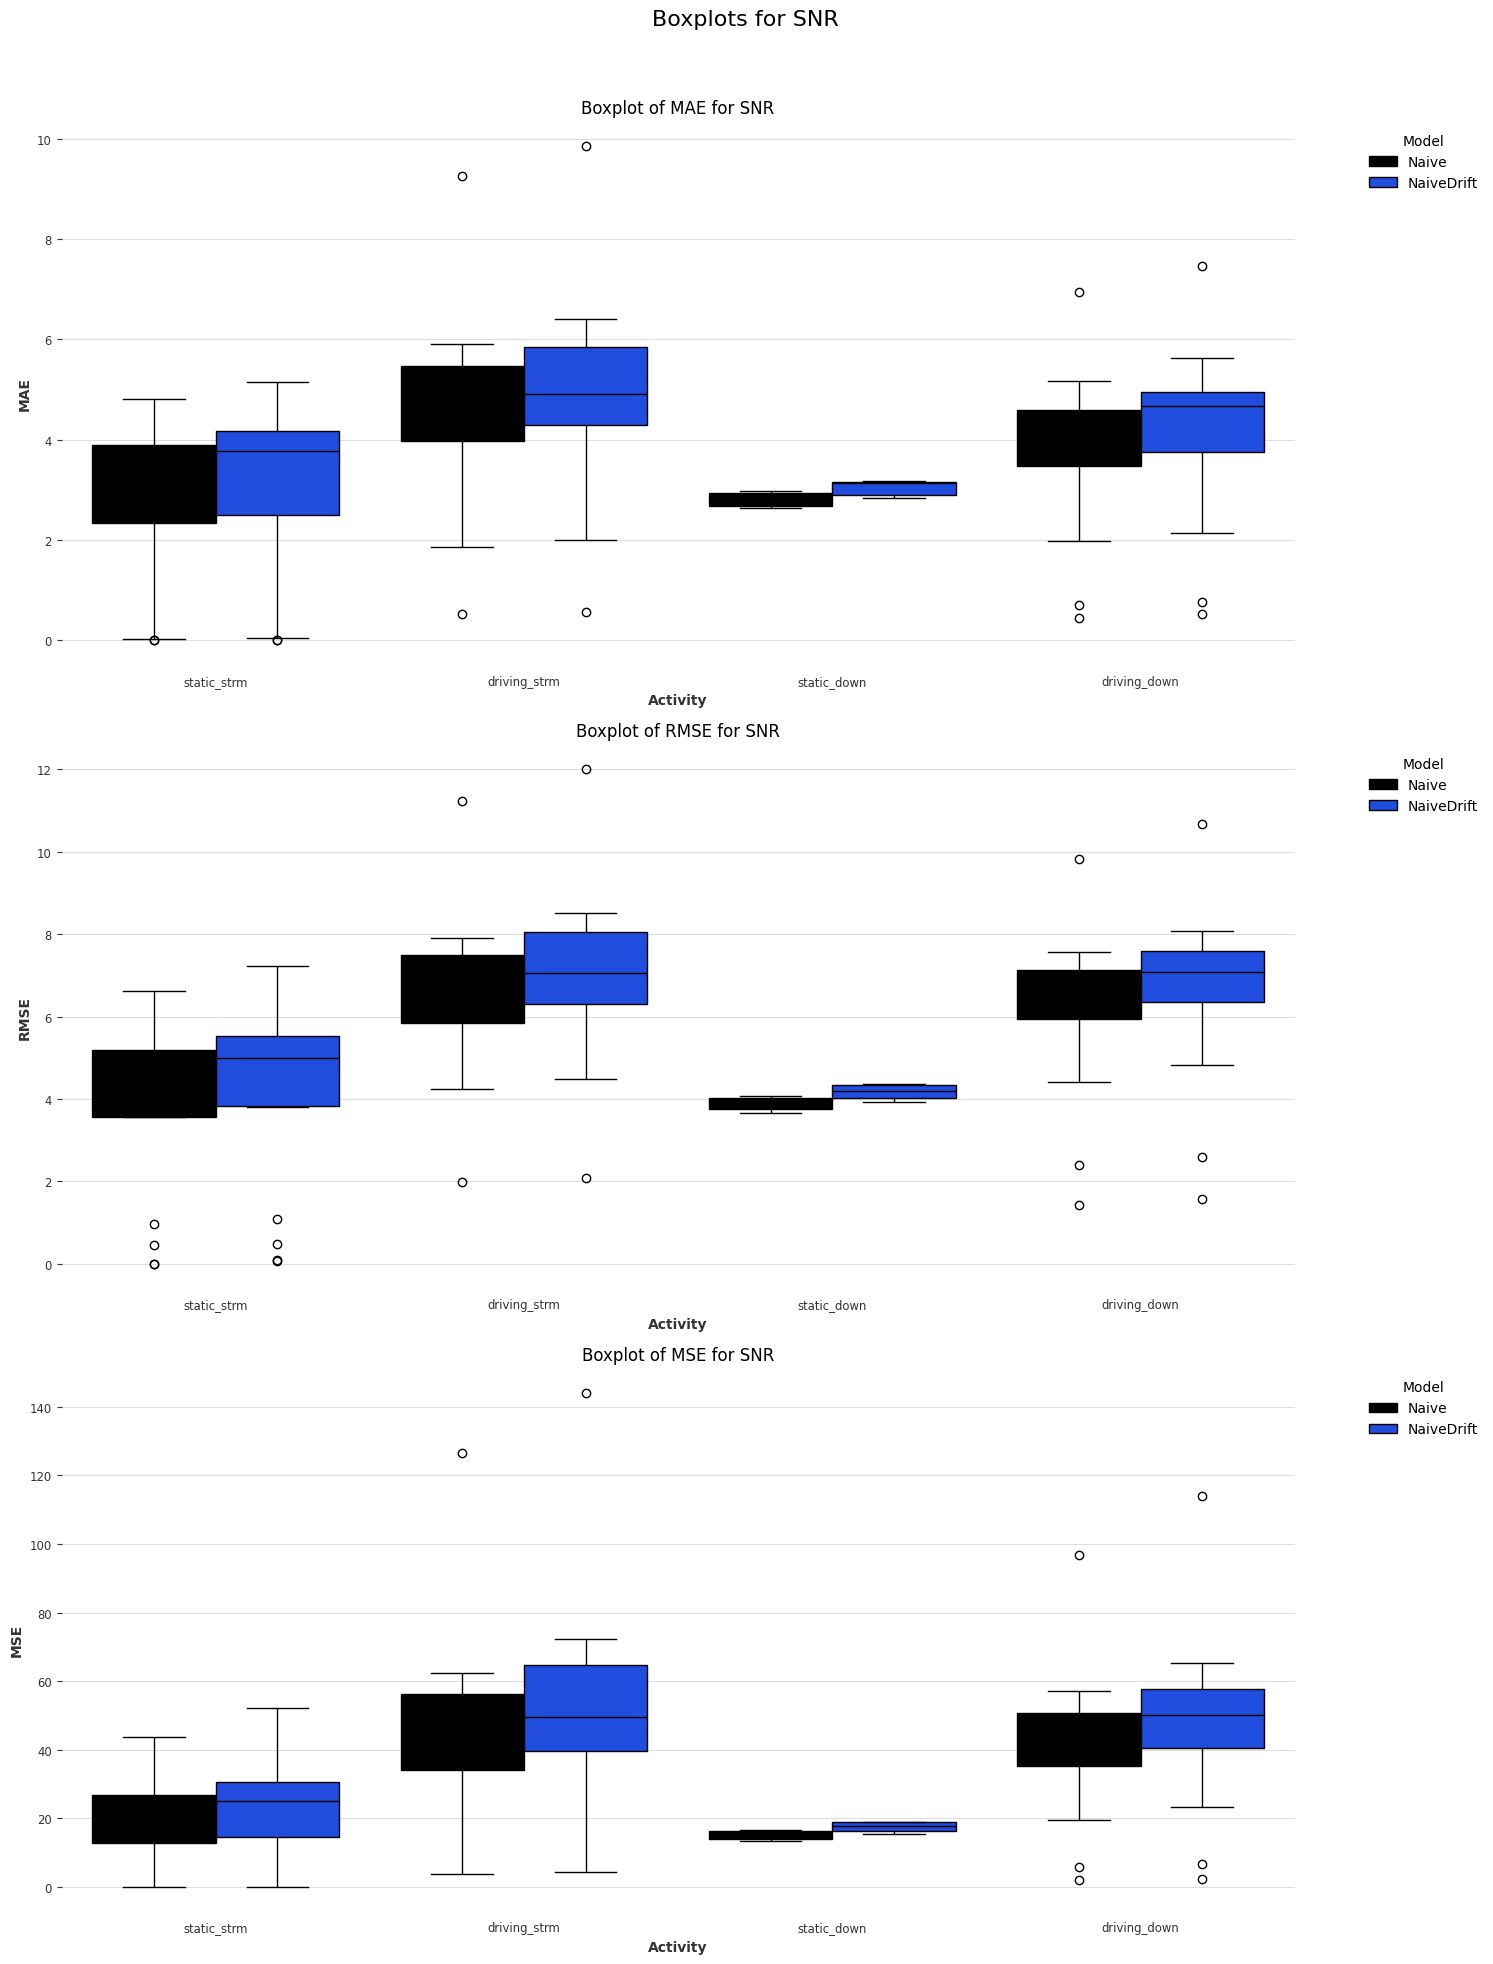

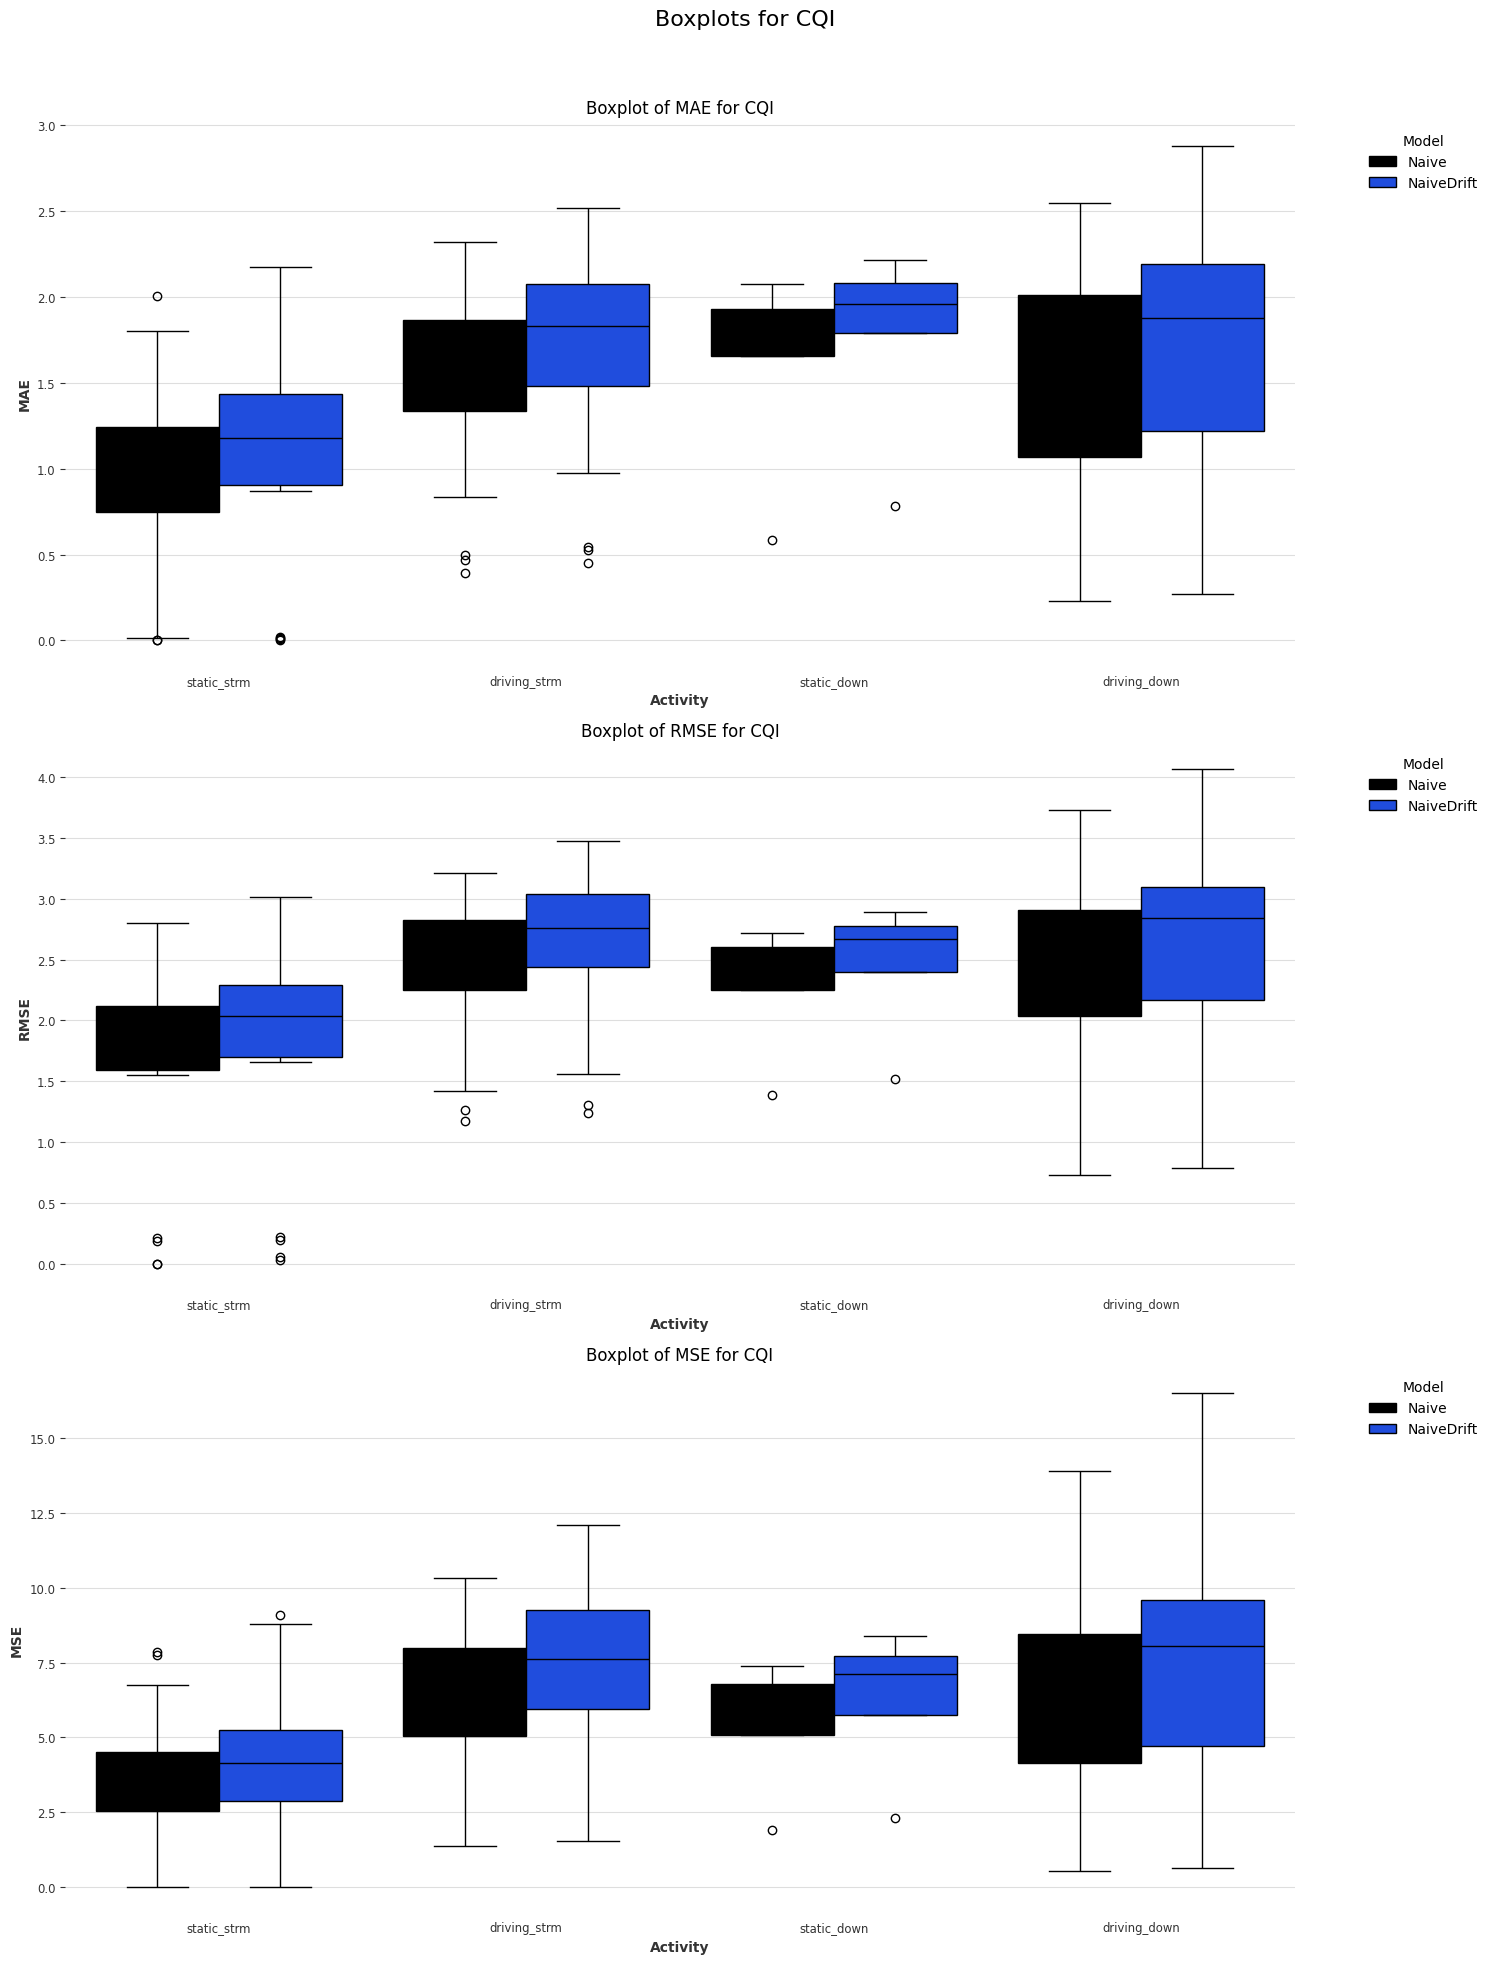

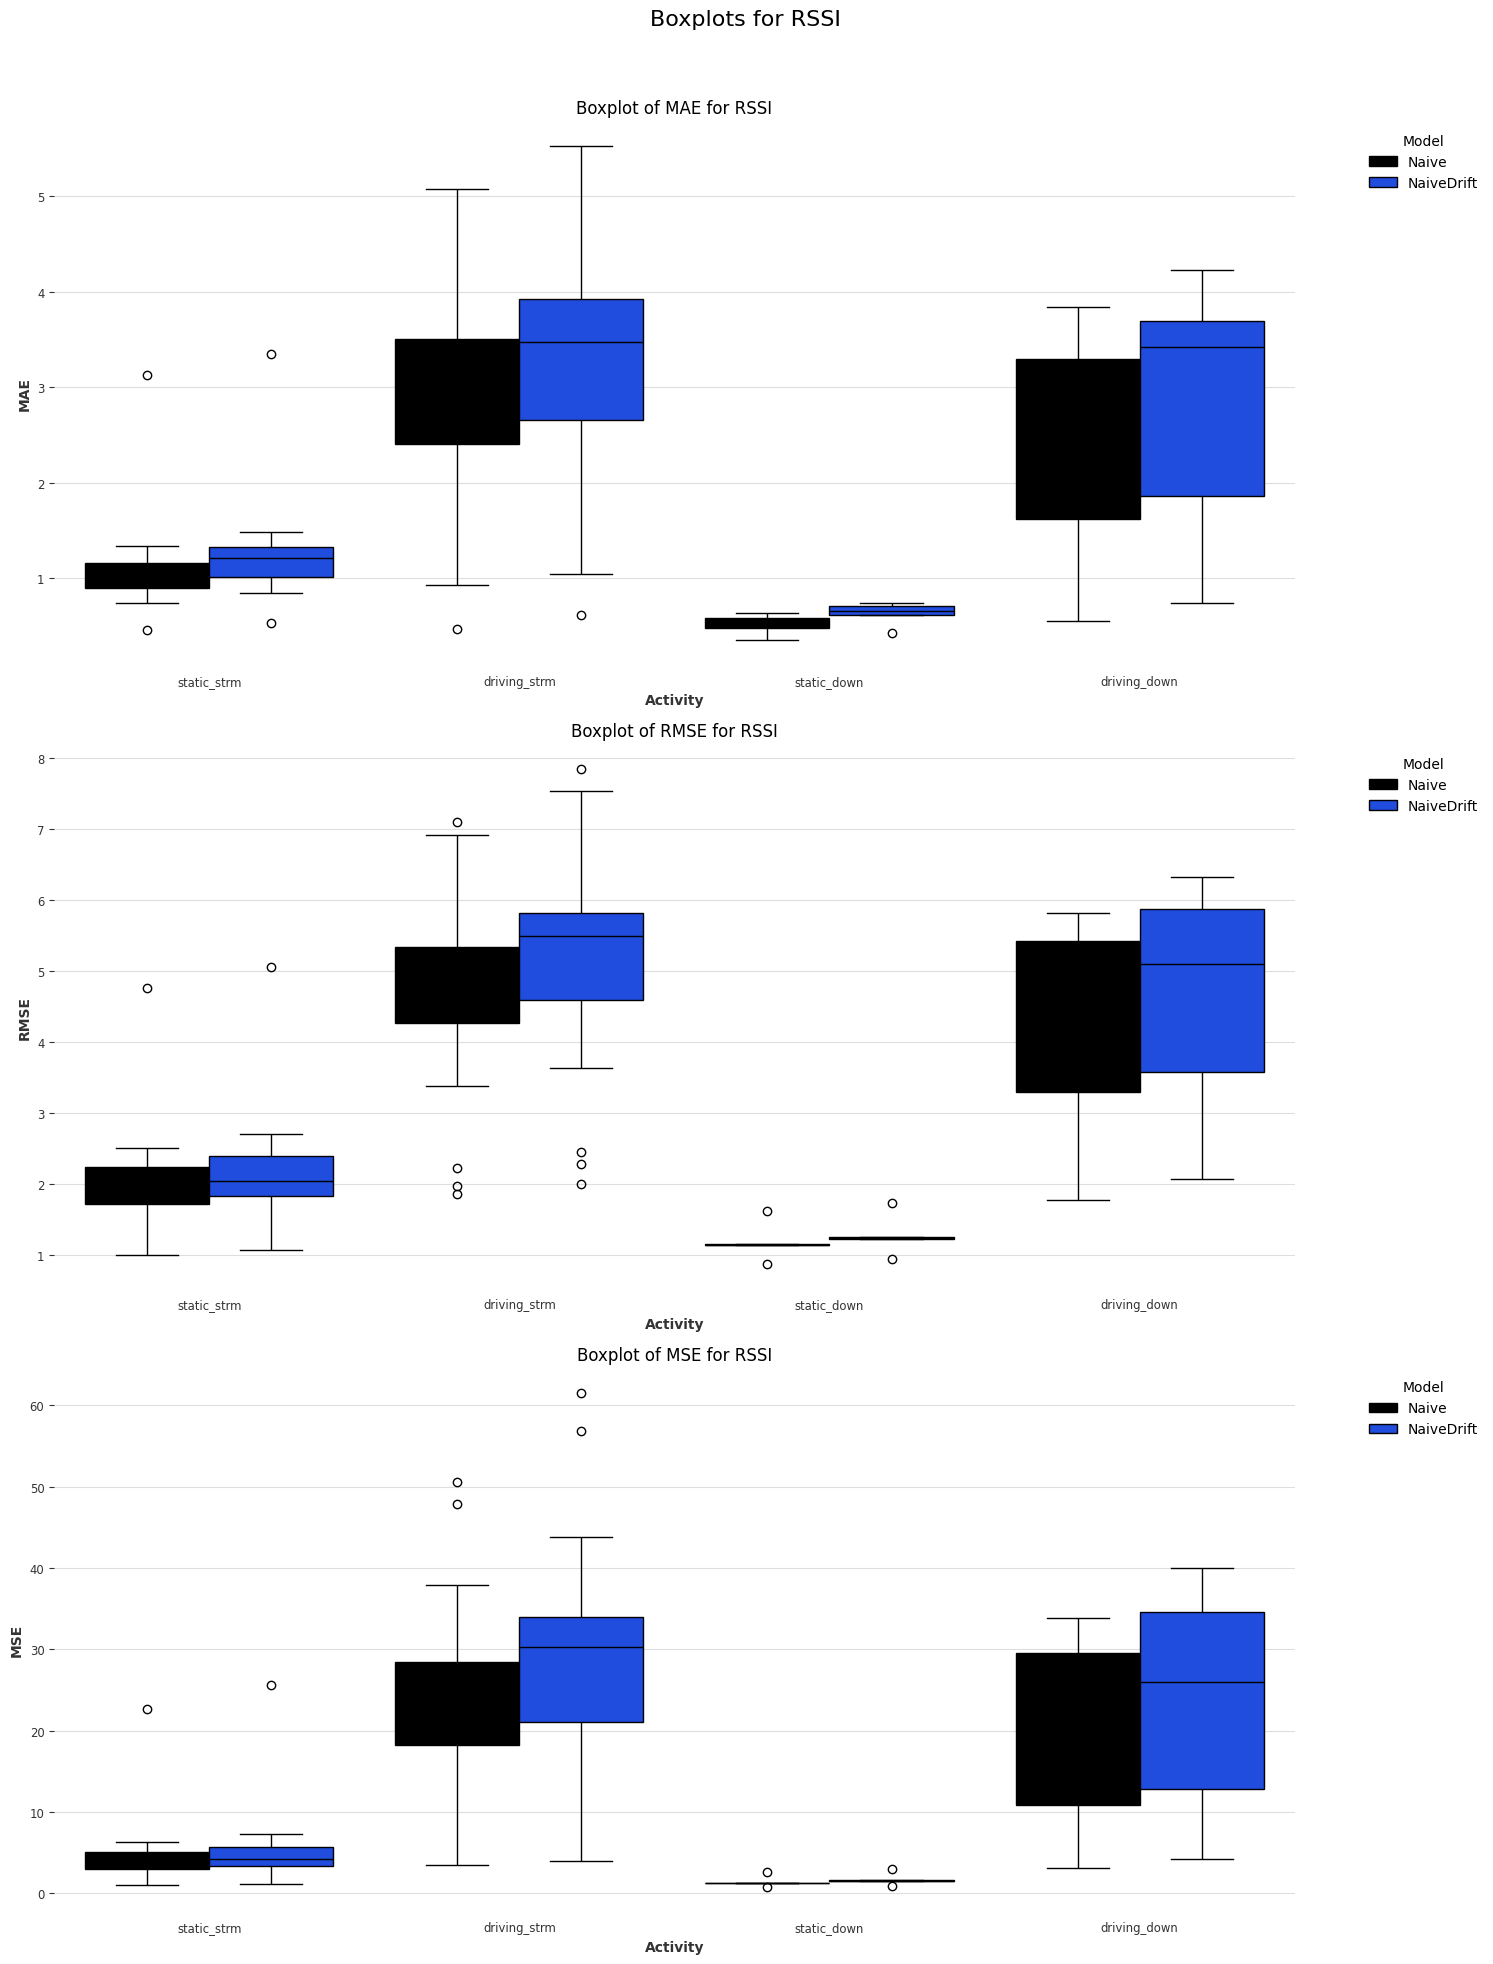

In [23]:
plot_metrics_by_target(data)

# Lendo os resultados das métricas geradas por um modelo

In [1]:
result_df = pd.read_parquet(os.path.join(os.pardir, "download-data", "results", "uni_Naive_static_strm.parquet"))

NameError: name 'pd' is not defined

In [31]:
result_df

,Time_Index,Model,Actuals,Preds,ElapsedTime,target
0,"[2020-01-06T11:09:02.000000000, 2020-01-06T11:...",Naive,"[-97.0, -97.0, -97.0, -97.0, -97.0, -97.0, -97...","[-97.0, -97.0, -97.0, -97.0, -97.0, -97.0, -97...",0.134088,RSRP
1,"[2020-01-06T11:09:02.000000000, 2020-01-06T11:...",Naive,"[-11.0, -11.0, -11.0, -11.0, -11.0, -11.0, -11...","[-11.0, -11.0, -11.0, -11.0, -11.0, -11.0, -11...",0.131251,RSRQ
2,"[2020-01-06T11:09:02.000000000, 2020-01-06T11:...",Naive,"[-7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7....","[-7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7....",0.130644,SNR
3,"[2020-01-06T11:09:02.000000000, 2020-01-06T11:...",Naive,"[14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14....","[14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14....",0.133070,CQI
4,"[2020-01-06T11:09:02.000000000, 2020-01-06T11:...",Naive,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.130511,RSSI
...,...,...,...,...,...,...
85,"[2019-11-26T13:51:38.000000000, 2019-11-26T13:...",Naive,"[-100.0, -105.0, -105.0, -104.0, -104.0, -104....","[-100.0, -100.0, -100.0, -100.0, -100.0, -100....",0.216887,RSRP
86,"[2019-11-26T13:51:38.000000000, 2019-11-26T13:...",Naive,"[-10.0, -12.000000000000002, -12.0000000000000...","[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10...",0.216159,RSRQ
87,"[2019-11-26T13:51:38.000000000, 2019-11-26T13:...",Naive,"[7.000000000000002, -5.0, -5.0, 3.000000000000...","[7.000000000000002, 7.000000000000002, 7.00000...",0.216515,SNR
88,"[2019-11-26T13:51:38.000000000, 2019-11-26T13:...",Naive,"[12.0, 12.0, 10.0, 13.0, 13.0, 13.0, 13.0, 13....","[13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13....",0.216460,CQI


## Um gráfico de comparação entre o resultado actual vs forescat em uma das sliding windows

In [32]:
def plot_actual_vs_preds(result_df: pd.DataFrame, row_number: int) -> None:
    """
    Plota as séries temporais reais versus as predições para uma linha específica do DataFrame.

    Args:
        result_df (pd.DataFrame): DataFrame contendo as colunas "Time_Index", "Actuals" e "Preds".
        row_number (int): Número da linha do DataFrame para plotar.
    """
    # Verifica se o índice da linha está dentro dos limites do DataFrame
    if row_number >= len(result_df):
        raise IndexError(f"row_number {row_number} está fora dos limites do DataFrame.")

    # Obtém os dados da linha especificada
    time_index = pd.DatetimeIndex(result_df["Time_Index"][row_number])
    actuals = result_df["Actuals"][row_number]
    preds = result_df["Preds"][row_number]

    # Cria séries temporais para os dados reais e predições
    ts_actuals = TimeSeries.from_times_and_values(time_index, actuals)
    ts_preds = TimeSeries.from_times_and_values(time_index, preds)

    # Plota as séries temporais
    plt.figure(figsize=(14, 7))
    ts_actuals.plot(label="Reais", color="blue")
    ts_preds.plot(label="Predições", color="red")

    # Adiciona título, legendas e labels
    plt.title(f"Comparação entre Reais e Predições - Linha {row_number}")
    plt.xlabel("Data/Hora")
    plt.ylabel("Valor")
    plt.legend()
    plt.grid(True)
    plt.show()

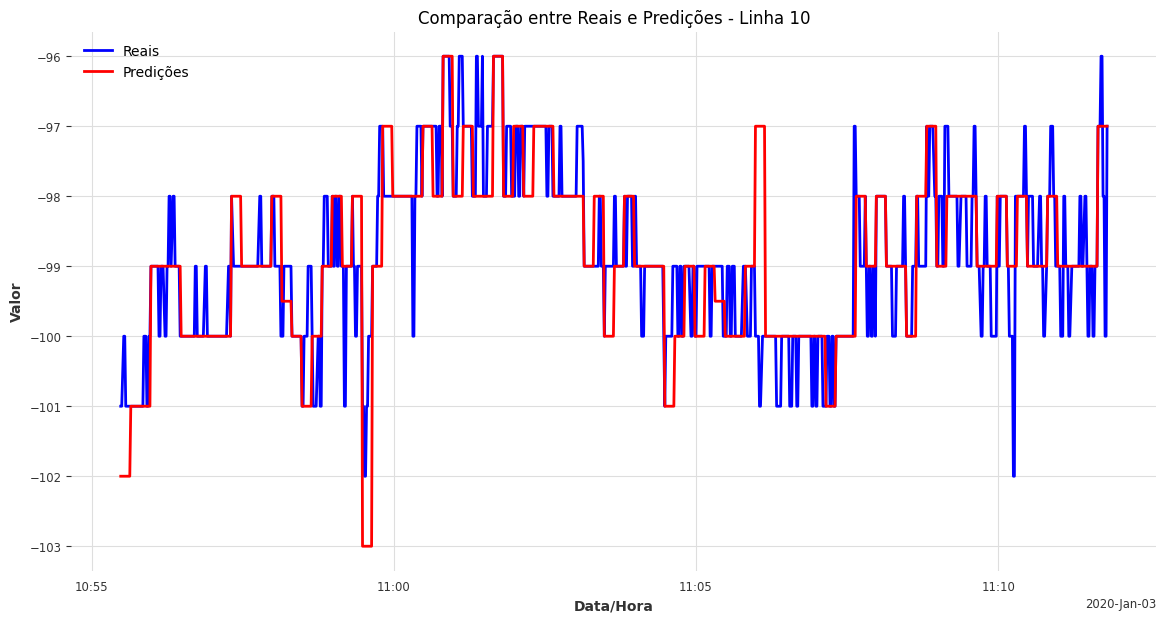

In [33]:
# Exemplo de uso
plot_actual_vs_preds(result_df, 10)